
========== IMAGE 1 ==========


/tmp/ipython-input-4145735748.py:70: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0,256], color='gray')


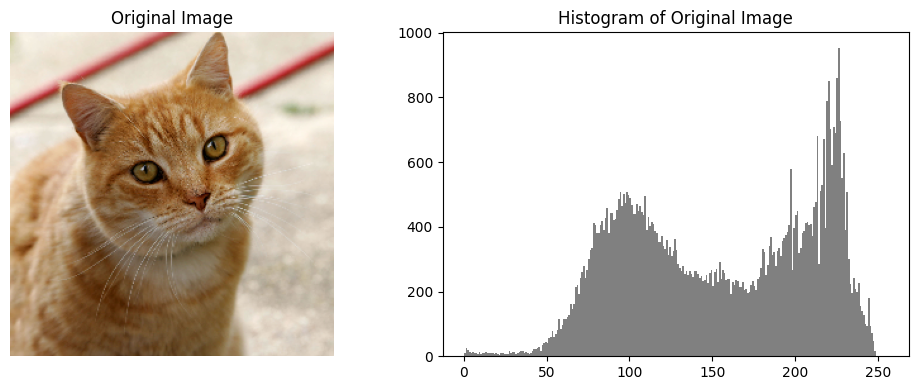

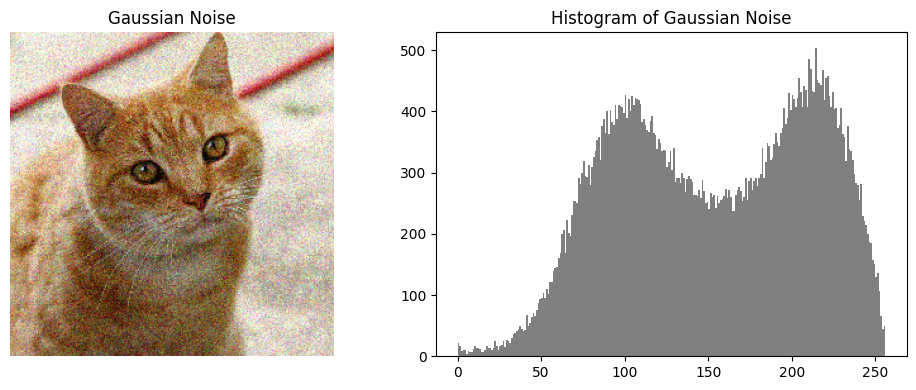

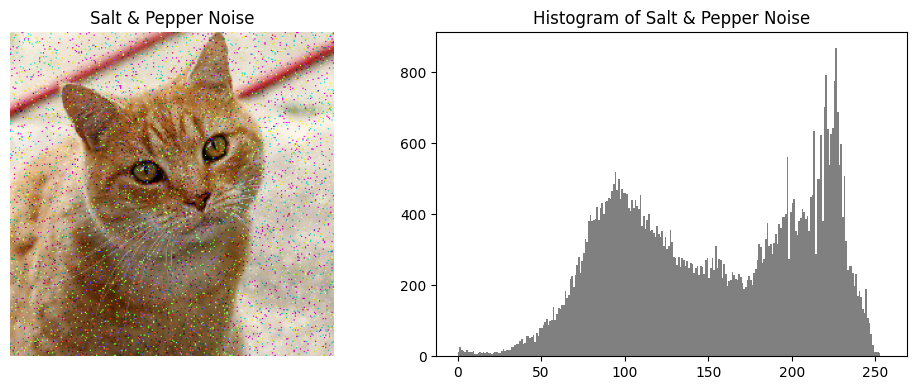

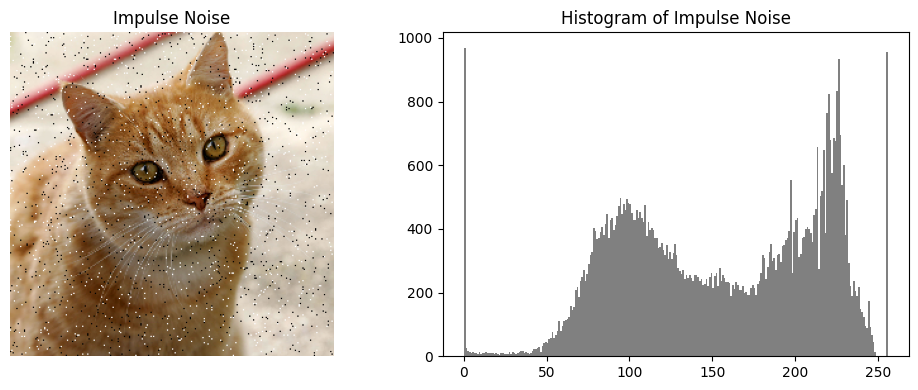


========== IMAGE 2 ==========


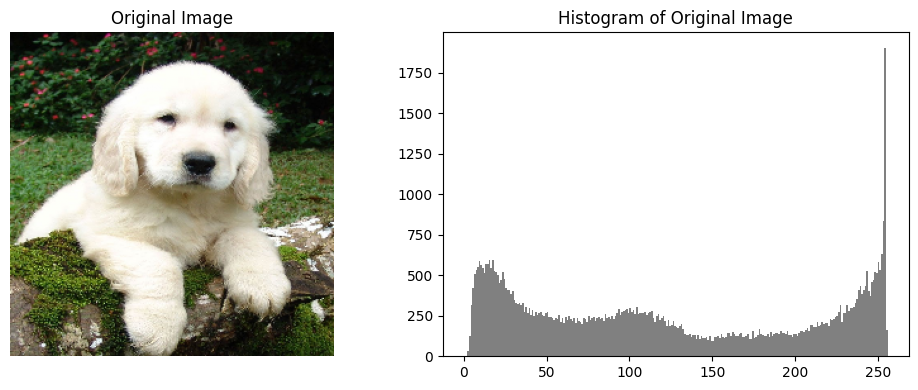

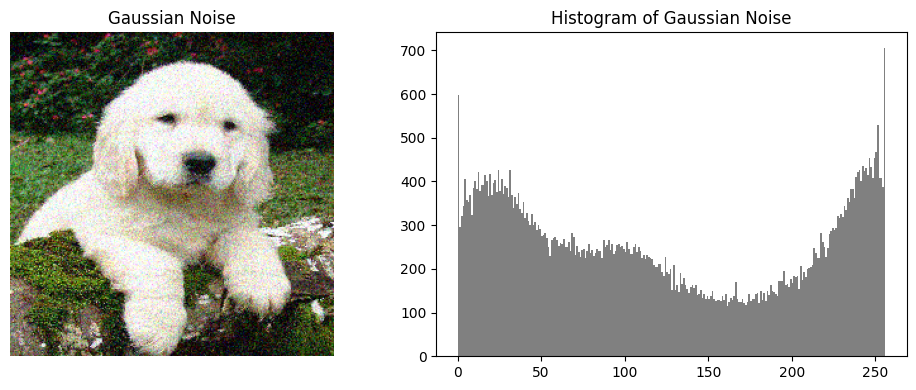

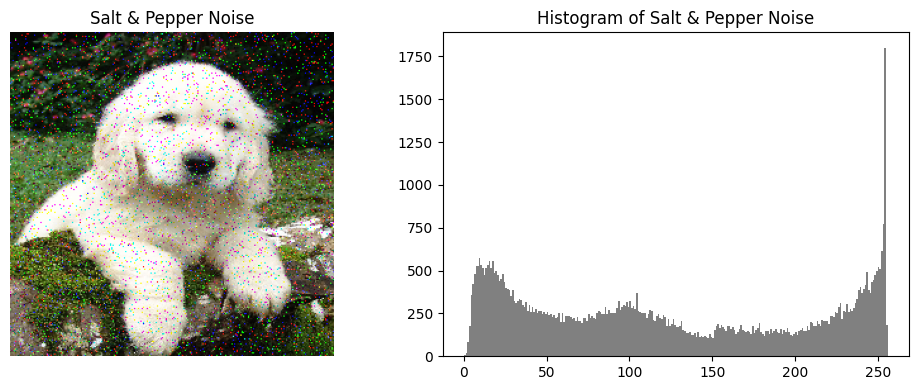

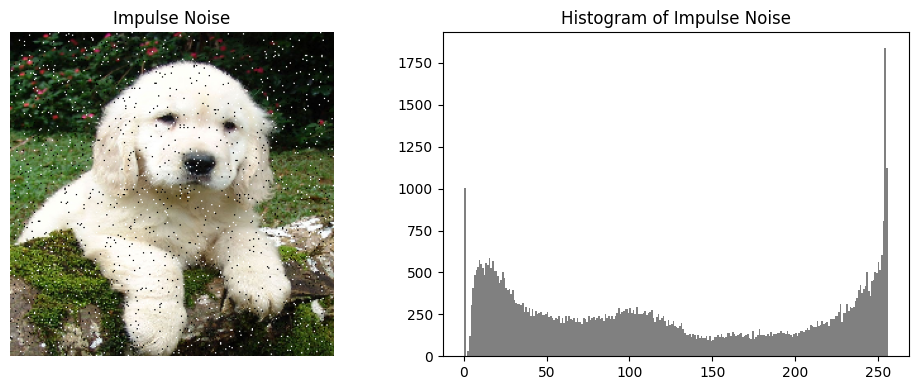


========== IMAGE 3 ==========


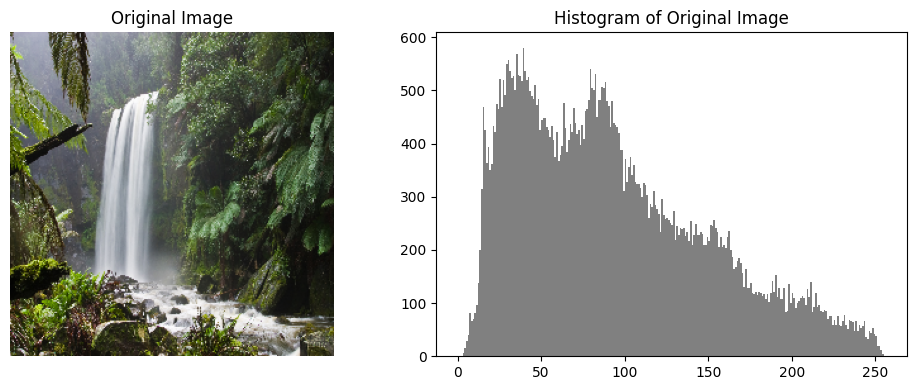

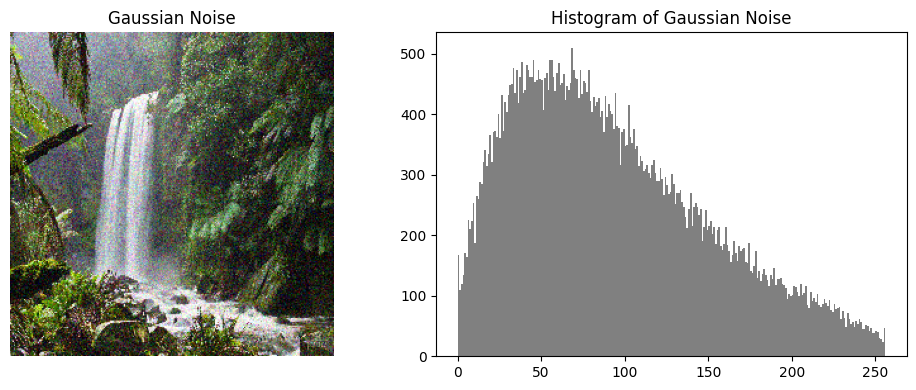

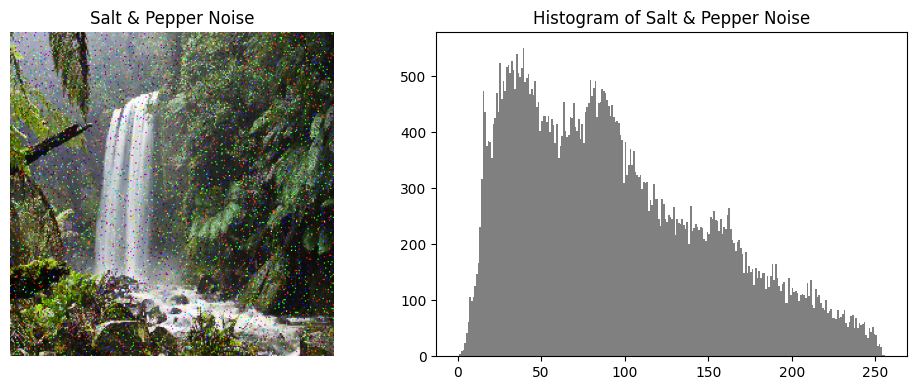

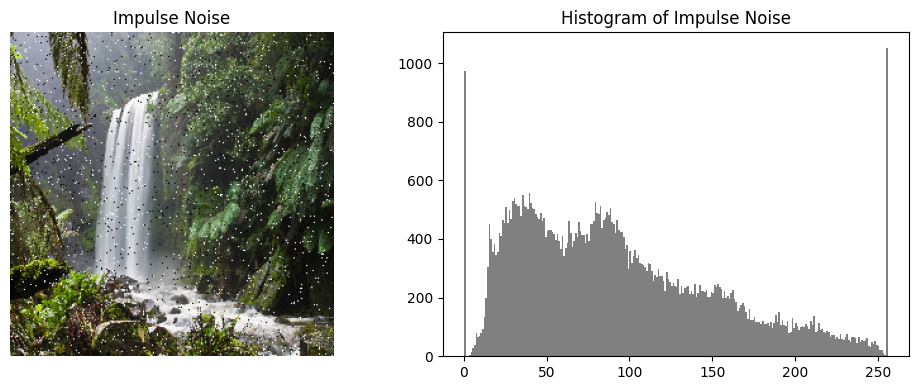


========== IMAGE 4 ==========


HTTPError: HTTP Error 404: Not Found

In [9]:
# ==========================================================
# TITLE: Implementation of Noise Models on Image Dataset
# ==========================================================
# AIM:
# To apply Gaussian, Salt & Pepper, and Impulse noise models on
# a small image dataset and analyze their effects using histograms.
# ==========================================================

# --- IMPORT LIBRARIES ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage import img_as_float
import urllib.request

# ==========================================================
# HELPER FUNCTION TO LOAD IMAGE (WITH USER-AGENT FIX)
# ==========================================================
def read_image_from_url(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    req = urllib.request.Request(url, headers=headers)
    with urllib.request.urlopen(req) as resp:
        image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    return img_as_float(img)

# ==========================================================
# ACCESSIBLE IMAGE URLS (PUBLIC DOMAINS)
# ==========================================================
image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg",          # Cat
    "https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg",     # Dog
    "https://upload.wikimedia.org/wikipedia/commons/3/36/Hopetoun_falls.jpg", # Waterfall
    "https://upload.wikimedia.org/wikipedia/commons/5/50/Vincent_van_Gogh_-_Wheatfield_with_Crows.jpg", # Painting
    "https://upload.wikimedia.org/wikipedia/commons/3/3a/An_Apple.jpg"        # Apple
]

# ==========================================================
# NOISE MODEL FUNCTIONS
# ==========================================================
def add_gaussian_noise(image):
    return random_noise(image, mode='gaussian', var=0.01)

def add_salt_pepper_noise(image):
    return random_noise(image, mode='s&p', amount=0.05)

def add_impulse_noise(image):
    noisy = image.copy()
    prob = 0.03
    black = np.random.rand(*image.shape[:2]) < (prob / 2)
    white = np.random.rand(*image.shape[:2]) > 1 - (prob / 2)
    noisy[black] = 0
    noisy[white] = 1
    return noisy

# ==========================================================
# FUNCTION TO DISPLAY IMAGE AND HISTOGRAM
# ==========================================================
def show_image_and_hist(title, img):
    gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.hist(gray.ravel(), 256, [0,256], color='gray')
    plt.title(f"Histogram of {title}")
    plt.tight_layout()
    plt.show()

# ==========================================================
# APPLY NOISE MODELS TO EACH IMAGE
# ==========================================================
for idx, url in enumerate(image_urls):
    print(f"\n========== IMAGE {idx+1} ==========")
    image = read_image_from_url(url)

    # Original
    show_image_and_hist("Original Image", image)

    # Gaussian Noise
    gaussian_img = add_gaussian_noise(image)
    show_image_and_hist("Gaussian Noise", gaussian_img)

    # Salt & Pepper Noise
    sp_img = add_salt_pepper_noise(image)
    show_image_and_hist("Salt & Pepper Noise", sp_img)

    # Impulse Noise
    impulse_img = add_impulse_noise(image)
    show_image_and_hist("Impulse Noise", impulse_img)

# ==========================================================
# CONCLUSION
# ==========================================================
print("""
Conclusion:
1. Gaussian Noise spreads pixel intensity values, creating smooth bell-shaped histograms.
2. Salt & Pepper Noise adds random black and white pixels, producing spikes at 0 and 255.
3. Impulse Noise affects fewer pixels, but still distorts histogram extremes.
4. Histogram analysis clearly shows how each noise model alters image intensity distribution.
""")
